In [20]:
a = 1
b = 2.5
c = "Inatel"
d = True
e = False
g = [1,2,3,4]
h = ["a", "b", "c", "d"]
i = ['A', 2]
j = {'cor': 'azul', 'tamanho': 30}
k = ('Item 1', 'Item 2')
l = [{'nome': "João", 'idade': 23}, {'nome': "Maria", 'idade': 22}]

In [21]:
print(a)
print("Seu nome: " + c)

1
Seu nome: Inatel


In [23]:
x = 18
if (x>8):
    print("A variavel x é maior que 8")

A variavel x e maior que 8


In [24]:
nomes = ['Maria', 'Carlos', 'João']
for x in nomes:
    print(x)

Maria
Carlos
João


In [26]:
def soma(a,b):
    return a+b

soma (2,3)

5

In [28]:
import pandas as pd

In [33]:
pd.DataFrame([[1,2,3,4],[4,5,6,7]])

,0,1,2,3
0,1,2,3,4
1,4,5,6,7


In [36]:
pessoas = pd.DataFrame([{'nome': "João", 'idade': 23}, {'nome': "Maria", 'idade': 22}, {'nome': "Carlos", 'idade': 58}, {'nome': "Pedro", 'idade': 12}])

In [37]:
pessoas['idade']

0    23
1    22
2    58
3    12
Name: idade, dtype: int64

In [39]:
pessoas['idade'].mean()

28.75

In [41]:
pessoas['maior'] = pessoas['idade'].apply(lambda x: True if x >= 18 else False)

In [42]:
pessoas

,nome,idade,maior
0,João,23,True
1,Maria,22,True
2,Carlos,58,True
3,Pedro,12,False


In [43]:
import pandas as pd
import numpy as np
import datetime

In [48]:
df = pd.read_csv('4G_traffic.csv')

In [49]:
df.shape

(497544, 4)

In [50]:
df.describe()

,Hour,Traffic
count,497544.000000,497544.000000
mean,11.496155,526.451673
std,6.911230,667.747113
min,0.000000,0.000000
25%,6.000000,73.683195
50%,11.000000,285.938680
75%,17.000000,725.174088
max,23.000000,10282.963340


In [51]:
df.head()

,Date,Hour,CellName,Traffic
0,10/23/2017 0:00,7,Cell_001803,15.13867
1,10/23/2017 0:00,2,Cell_002303,2.05516
2,10/23/2017 0:00,7,Cell_004083,71.55308
3,10/23/2017 0:00,0,Cell_003781,557.98491
4,10/23/2017 0:00,3,Cell_000112,0.98166


In [52]:
def join_date(row):
    date = row['Date'].split(' ')[0]
    hour = f" {row['Hour']}:00"
    return datetime.datetime.strptime(date+hour, '%m/%d/%Y %H:%M')

In [53]:
df['DateTime'] = df.apply(join_date, axis=1)

In [54]:
df.head()

,Date,Hour,CellName,Traffic,DateTime
0,10/23/2017 0:00,7,Cell_001803,15.13867,2017-10-23 07:00:00
1,10/23/2017 0:00,2,Cell_002303,2.05516,2017-10-23 02:00:00
2,10/23/2017 0:00,7,Cell_004083,71.55308,2017-10-23 07:00:00
3,10/23/2017 0:00,0,Cell_003781,557.98491,2017-10-23 00:00:00
4,10/23/2017 0:00,3,Cell_000112,0.98166,2017-10-23 03:00:00


In [55]:
df.drop(['Date','Hour'], axis=1, inplace=True)

In [56]:
df.head()

,CellName,Traffic,DateTime
0,Cell_001803,15.13867,2017-10-23 07:00:00
1,Cell_002303,2.05516,2017-10-23 02:00:00
2,Cell_004083,71.55308,2017-10-23 07:00:00
3,Cell_003781,557.98491,2017-10-23 00:00:00
4,Cell_000112,0.98166,2017-10-23 03:00:00


In [57]:
df = df[['DateTime','CellName','Traffic']]

In [58]:
df.head()

,DateTime,CellName,Traffic
0,2017-10-23 07:00:00,Cell_001803,15.13867
1,2017-10-23 02:00:00,Cell_002303,2.05516
2,2017-10-23 07:00:00,Cell_004083,71.55308
3,2017-10-23 00:00:00,Cell_003781,557.98491
4,2017-10-23 03:00:00,Cell_000112,0.98166


In [59]:
df_avg = df.groupby(['CellName'])['Traffic'].mean()

In [61]:
df_avg.head()

CellName
Cell_000111    826.539594
Cell_000112    395.399762
Cell_000113    502.557161
Cell_000231    507.977037
Cell_000232    428.892371
Name: Traffic, dtype: float64

In [62]:
df_avg = df_avg.reset_index().sort_values(by='Traffic', ascending=False)

In [63]:
df_avg.head()

,CellName,Traffic
38,Cell_003793,1146.074445
47,Cell_006653,1041.518544
40,Cell_004072,1024.744420
15,Cell_001791,928.210292
45,Cell_006651,899.250459


In [64]:
df_cell93 = df[df['CellName'] == 'Cell_003793']

In [65]:
df_cell93.head()

,DateTime,CellName,Traffic
40,2017-10-23 16:00:00,Cell_003793,220.60219
53,2017-10-23 18:00:00,Cell_003793,2137.26495
61,2017-10-23 20:00:00,Cell_003793,3573.06291
67,2017-10-23 22:00:00,Cell_003793,569.25024
77,2017-10-23 10:00:00,Cell_003793,584.61053


In [66]:
df_cell93_month = df_cell93.set_index('DateTime').groupby(pd.Grouper(freq='M')).mean()

In [67]:
df_cell93_month.head()

,Traffic
DateTime,
2017-10-31,612.843579
2017-11-30,652.696231
2017-12-31,652.073250
2018-01-31,727.693129
2018-02-28,1070.738298


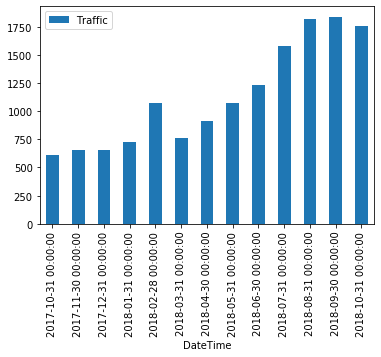

In [69]:
df_cell93_month.plot.bar()

In [116]:
df_cell93_201809 = df_cell93[(df_cell93['DateTime'] > '2018-09-01') & (df_cell93['DateTime'] <= '2018-09-30')]

In [117]:
df_cell93_201809.head()

,DateTime,CellName,Traffic
426735,2018-09-01 06:00:00,Cell_003793,886.81161
426746,2018-09-01 04:00:00,Cell_003793,218.04911
426780,2018-09-01 23:00:00,Cell_003793,2524.86956
426854,2018-09-01 17:00:00,Cell_003793,2704.64340
427015,2018-09-01 14:00:00,Cell_003793,1796.25271


In [105]:
df_cell93_201809.shape

(692, 3)

In [106]:
df_cell93_201809_day = df_cell93_201809.set_index('DateTime').groupby(pd.Grouper(freq='D')).mean()

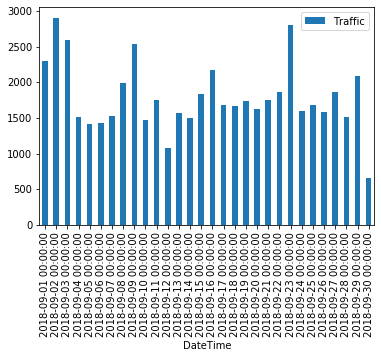

In [107]:
df_cell93_201809_day.plot.bar()

In [108]:
df_cell93_201809_day.shape

(30, 1)

In [109]:
df_cell93_201809_day = df_cell93_201809_day.sort_values(by='Traffic', ascending=False)

In [110]:
df_cell93_201809_day.head()

,Traffic
DateTime,
2018-09-02,2905.031414
2018-09-23,2796.101143
2018-09-03,2592.898723
2018-09-09,2539.180058
2018-09-01,2299.637862


In [111]:
df_cell93_20180902 = df_cell93[(df_cell93['DateTime'] >= '2018-09-02') & (df_cell93['DateTime'] < '2018-09-03')]

In [112]:
df_cell93_20180902.head()

,DateTime,CellName,Traffic
428137,2018-09-02 00:00:00,Cell_003793,938.24982
428204,2018-09-02 05:00:00,Cell_003793,825.79943
428270,2018-09-02 07:00:00,Cell_003793,1522.44144
428309,2018-09-02 23:00:00,Cell_003793,2800.44253
428354,2018-09-02 20:00:00,Cell_003793,3127.74672


In [113]:
df_cell93_20180902.shape

(24, 3)

In [119]:
df_cell93_20180902 = df_cell93_20180902.sort_values(by='DateTime')

In [121]:
df_cell93_20180902.set_index('DateTime', inplace=True)

In [124]:
df_cell93_20180902

,CellName,Traffic
DateTime,,
2018-09-02 00:00:00,Cell_003793,938.24982
2018-09-02 01:00:00,Cell_003793,508.05927
2018-09-02 02:00:00,Cell_003793,1560.45242
2018-09-02 03:00:00,Cell_003793,151.06040
2018-09-02 04:00:00,Cell_003793,240.39783
2018-09-02 05:00:00,Cell_003793,825.79943
2018-09-02 06:00:00,Cell_003793,945.77117
2018-09-02 07:00:00,Cell_003793,1522.44144
2018-09-02 08:00:00,Cell_003793,2598.27832


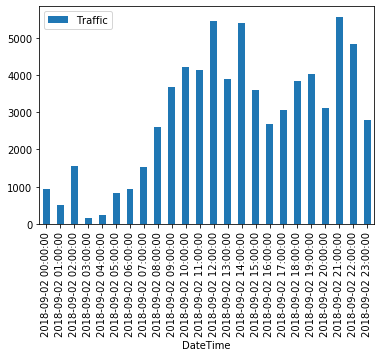

In [125]:
df_cell93_20180902.plot.bar()

In [126]:
df.sort_values('Traffic', ascending=False)[:10]

,DateTime,CellName,Traffic
497477,2018-10-22 22:00:00,Cell_004073,10282.96334
445631,2018-09-14 03:00:00,Cell_004072,9640.18021
494679,2018-10-20 21:00:00,Cell_006661,8873.07994
206759,2018-03-23 15:00:00,Cell_000462,8619.50463
409097,2018-08-18 20:00:00,Cell_003793,8412.21761
363860,2018-07-16 14:00:00,Cell_006651,8403.72709
423149,2018-08-29 21:00:00,Cell_004072,8334.38913
303383,2018-06-02 16:00:00,Cell_006651,8201.65161
474203,2018-10-05 21:00:00,Cell_000111,8200.43549
485096,2018-10-13 20:00:00,Cell_006661,8122.70399


In [134]:
df_natal_month = df.set_index('DateTime').groupby(pd.Grouper(freq='M')).mean()

In [138]:
df_natal_month

,Traffic
DateTime,
2017-10-31,242.070755
2017-11-30,277.820034
2017-12-31,297.319168
2018-01-31,310.937760
2018-02-28,451.366820
2018-03-31,382.080225
2018-04-30,442.578244
2018-05-31,515.535185
2018-06-30,642.914413


In [139]:
df_natal_month_day = df.set_index('DateTime').groupby(pd.Grouper(freq='D')).mean()

In [140]:
df_natal_month_day

,Traffic
DateTime,
2017-10-23,210.647243
2017-10-24,227.011231
2017-10-25,216.127316
2017-10-26,207.749936
2017-10-27,224.193068
...,...
2018-10-18,818.283265
2018-10-19,887.460794
2018-10-20,947.628225


In [141]:
df_natal_month_day_hour = df.set_index('DateTime').groupby(pd.Grouper(freq='H')).mean()

In [142]:
df_natal_month_day_hour

,Traffic
DateTime,
2017-10-23 00:00:00,49.155743
2017-10-23 01:00:00,17.716571
2017-10-23 02:00:00,16.635746
2017-10-23 03:00:00,10.443251
2017-10-23 04:00:00,29.735792
...,...
2018-10-22 19:00:00,2292.226987
2018-10-22 20:00:00,2339.705525
2018-10-22 21:00:00,1877.776245


In [143]:
df_by_hour = df.groupby(['DateTime'])['Traffic'].mean()

In [144]:
df_by_hour

DateTime
2017-10-23 00:00:00      49.155743
2017-10-23 01:00:00      17.716571
2017-10-23 02:00:00      16.635746
2017-10-23 03:00:00      10.443251
2017-10-23 04:00:00      29.735792
                          ...     
2018-10-22 19:00:00    2292.226987
2018-10-22 20:00:00    2339.705525
2018-10-22 21:00:00    1877.776245
2018-10-22 22:00:00    1409.722080
2018-10-22 23:00:00     762.438428
Name: Traffic, Length: 8738, dtype: float64

In [147]:
df_by_hour2 = df_by_hour.reset_index().sort_values(by='DateTime', ascending=False)

In [146]:
df_by_hour.head()

,DateTime,Traffic
8535,2018-10-14 12:00:00,2577.206810
8519,2018-10-13 20:00:00,2532.875992
8686,2018-10-20 20:00:00,2392.289017
8639,2018-10-18 20:00:00,2365.692585
7512,2018-09-01 21:00:00,2360.285155


In [148]:
df_by_hour2.head()

,index,DateTime,Traffic
1964,8737,2018-10-22 23:00:00,762.438428
454,8736,2018-10-22 22:00:00,1409.722080
93,8735,2018-10-22 21:00:00,1877.776245
6,8734,2018-10-22 20:00:00,2339.705525
9,8733,2018-10-22 19:00:00,2292.226987


In [156]:
df_natal_hora = df_by_hour[(df_by_hour['DateTime'] >= '2017-12-24 18:00:00') & (df_by_hour['DateTime'] < '2017-12-25 23:00:00')]

In [157]:
df_natal_hora

,DateTime,Traffic
1530,2017-12-25 20:00:00,693.045611
1529,2017-12-25 19:00:00,661.878339
1506,2017-12-24 20:00:00,611.112486
1505,2017-12-24 19:00:00,605.523052
1531,2017-12-25 21:00:00,575.625316
1528,2017-12-25 18:00:00,534.806259
1507,2017-12-24 21:00:00,513.107964
1526,2017-12-25 16:00:00,503.356741
1504,2017-12-24 18:00:00,492.089900
1527,2017-12-25 17:00:00,488.089338


In [160]:
df_natal_hora = df_natal_hora.sort_values(by='DateTime', ascending=True)

In [161]:
df_natal_hora

,DateTime,Traffic
1504,2017-12-24 18:00:00,492.089900
1505,2017-12-24 19:00:00,605.523052
1506,2017-12-24 20:00:00,611.112486
1507,2017-12-24 21:00:00,513.107964
1508,2017-12-24 22:00:00,393.997140
1509,2017-12-24 23:00:00,263.810411
1510,2017-12-25 00:00:00,178.514566
1511,2017-12-25 01:00:00,82.268968
1512,2017-12-25 02:00:00,34.911879
1513,2017-12-25 03:00:00,47.325293


In [169]:
df_natal_hora.set_index('DateTime', inplace=True)

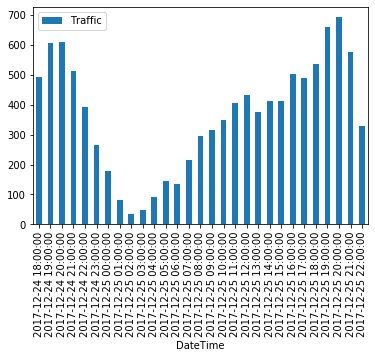

In [170]:
df_natal_hora.plot.bar()

In [164]:
df_ny_hora = df_by_hour[(df_by_hour['DateTime'] >= '2017-12-31 18:00:00') & (df_by_hour['DateTime'] < '2018-01-01 23:00:00')]

In [165]:
df_ny_hora

,DateTime,Traffic
1674,2017-12-31 20:00:00,1065.263109
1675,2017-12-31 21:00:00,999.163318
1676,2017-12-31 22:00:00,821.468994
1698,2018-01-01 20:00:00,812.757781
1673,2017-12-31 19:00:00,810.261314
1689,2018-01-01 11:00:00,790.918907
1672,2017-12-31 18:00:00,757.538907
1688,2018-01-01 10:00:00,737.419321
1690,2018-01-01 12:00:00,734.489782
1699,2018-01-01 21:00:00,712.817106


In [166]:
df_ny_hora = df_ny_hora.sort_values(by='DateTime', ascending=True)

In [167]:
df_ny_hora.set_index

,DateTime,Traffic
1672,2017-12-31 18:00:00,757.538907
1673,2017-12-31 19:00:00,810.261314
1674,2017-12-31 20:00:00,1065.263109
1675,2017-12-31 21:00:00,999.163318
1676,2017-12-31 22:00:00,821.468994
1677,2017-12-31 23:00:00,553.281968
1678,2018-01-01 00:00:00,223.973714
1679,2018-01-01 01:00:00,124.628069
1680,2018-01-01 02:00:00,80.246979
1681,2018-01-01 03:00:00,48.547137


In [171]:
df_ny_hora.set_index('DateTime', inplace=True)

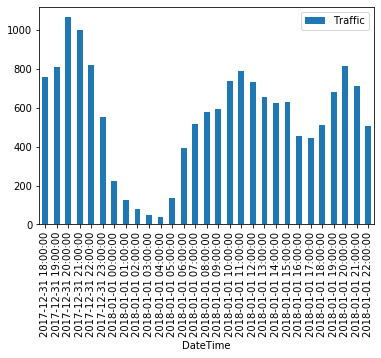

In [172]:
df_ny_hora.plot.bar()

In [191]:
df_by_hour2= df.groupby(['DateTime'])['Traffic'].mean()

In [208]:
df_by_hour2 = df_by_hour.reset_index().sort_values(by='DateTime', ascending=True)

In [215]:
df_bf_hora = df_by_hour2[(df_by_hour2['DateTime'] >= '2017-11-24 01:00:00') & (df_by_hour2['DateTime'] < '2017-12-25 01:00:00')]

In [216]:
df_bf_hora.set_index('DateTime', inplace=True)

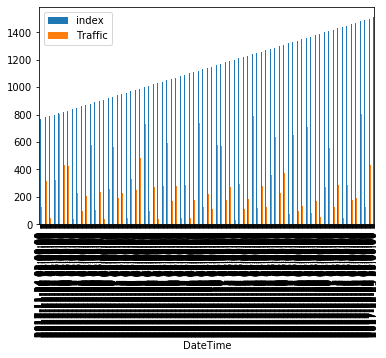

In [217]:
df_bf_hora.plot.bar()